In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_activation_functions():
    x = np.linspace(-5, 5, 1000)
    y_relu = np.maximum(x, 0)
    y_sigmoid = 1 / (1 + np.exp(-x))
    y_tanh = np.tanh(x)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Funciones de activación', fontsize=16)
    
    axes[0].plot(x, y_relu)
    axes[0].set_title('ReLU')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    
    axes[1].plot(x, y_sigmoid)
    axes[1].set_title('Sigmoid')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    
    axes[2].plot(x, y_tanh)
    axes[2].set_title('Tanh')
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('y')
    
    plt.savefig('activations.png', dpi=300, bbox_inches='tight')
    plt.show()

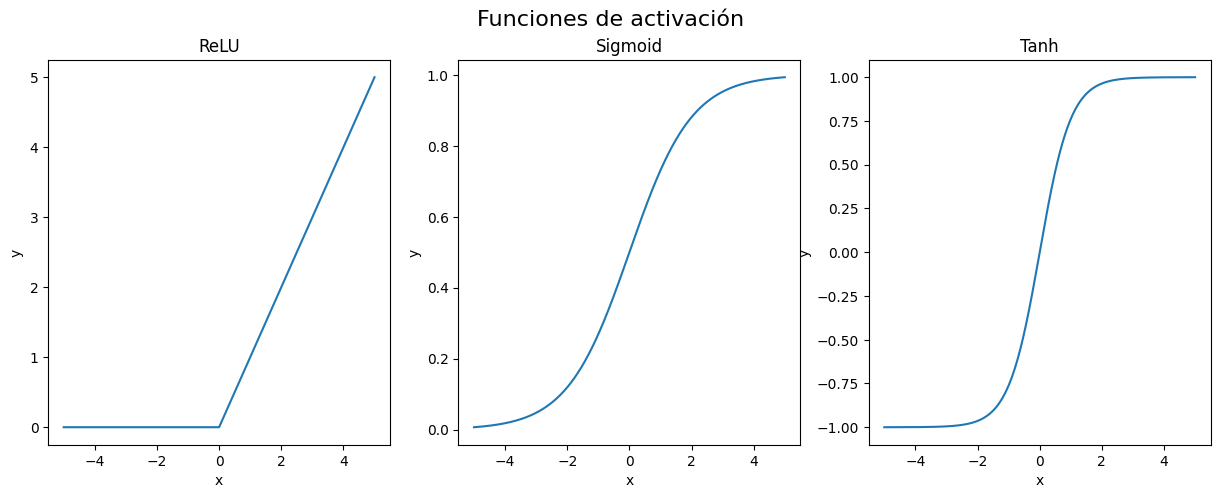

In [12]:
plot_activation_functions()


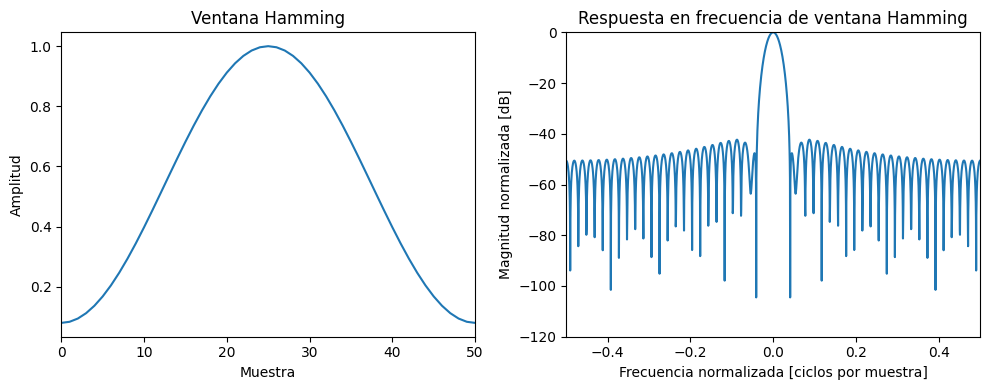

In [6]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

# Generamos la ventana Hamming
window = signal.windows.hamming(51)

# Creamos una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Trazamos el gráfico de la ventana Hamming en el primer subplot
ax1.plot(window)
ax1.set_title("Ventana Hamming")
ax1.set_xlabel("Muestra")
ax1.set_ylabel("Amplitud")
ax1.set_xlim([0, len(window)-1])

# Calculamos y trazamos el espectro de frecuencia en el segundo subplot
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
ax2.plot(freq, response)
ax2.set_title("Respuesta en frecuencia de ventana Hamming")
ax2.set_xlabel("Frecuencia normalizada [ciclos por muestra]")
ax2.set_ylabel("Magnitud normalizada [dB]")
ax2.set_xlim([-0.5, 0.5])
ax2.set_ylim([-120, 0])

# Ajustamos el diseño del gráfico y lo mostramos
fig.tight_layout()

plt.savefig('hamming.svg', bbox_inches='tight')
plt.show()



## Generar imagenes STFT para reflejar el cambio en el ancho de ventana.

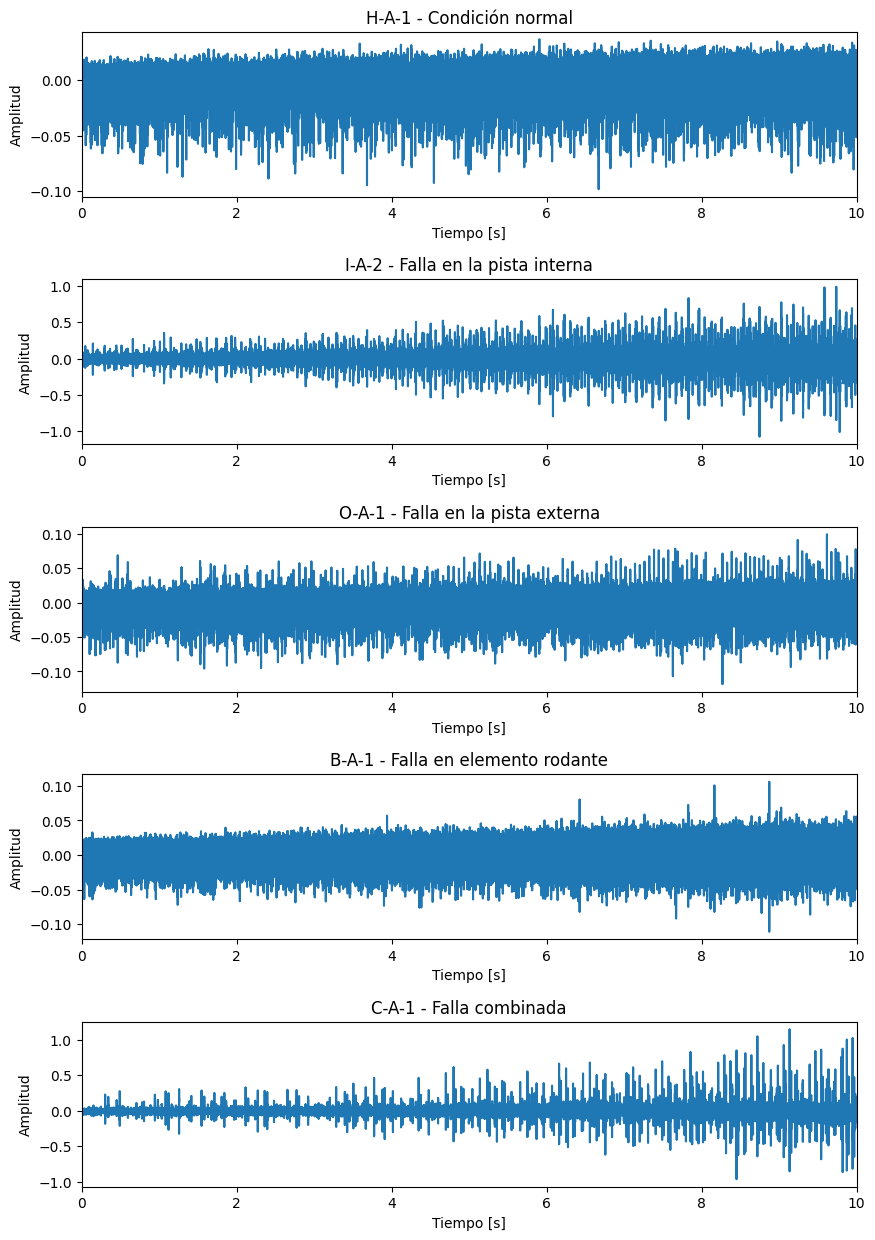

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Cargar los datos de los archivos mat
H_A_1 = sio.loadmat(r'ALL/H-A-1.mat')['Channel_1']
I_A_2 = sio.loadmat(r'ALL/I-A-2.mat')['Channel_1']
O_A_1 = sio.loadmat(r'ALL/O-A-1.mat')['Channel_1']
B_A_1 = sio.loadmat(r'ALL/B-A-1.mat')['Channel_1']
C_A_1 = sio.loadmat(r'ALL/C-A-1.mat')['Channel_1']

# Definir la frecuencia de muestreo
fs = 200000

# Crear una variable de tiempo para los datos (de 0 a 10 segundos)
t = np.linspace(0, 10, len(H_A_1))

# Crear una figura para los gráficos
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

# Graficar las señales de vibración en cada uno de los subgráficos
axs[0].plot(t, H_A_1)
axs[0].set_title('H-A-1 - Condición normal')
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('Amplitud')
axs[0].set_xlim([0, 10])

axs[1].plot(t, I_A_2)
axs[1].set_title('I-A-2 - Falla en la pista interna')
axs[1].set_xlim([0, 10])
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud')

axs[2].plot(t, O_A_1)
axs[2].set_title('O-A-1 - Falla en la pista externa')
axs[2].set_xlim([0, 10])
axs[2].set_xlabel('Tiempo [s]')
axs[2].set_ylabel('Amplitud')

axs[3].plot(t, B_A_1)
axs[3].set_title('B-A-1 - Falla en elemento rodante')
axs[3].set_xlim([0, 10])
axs[3].set_xlabel('Tiempo [s]')
axs[3].set_ylabel('Amplitud')

axs[4].plot(t, C_A_1)
axs[4].set_title('C-A-1 - Falla combinada')
axs[4].set_xlim([0, 10])
axs[4].set_xlabel('Tiempo [s]')
axs[4].set_ylabel('Amplitud')

# Agregar títulos y etiquetas de los ejes


# Ajustar el espacio vertical entre los subplots
fig.subplots_adjust(hspace=0.5)

# Mostrar el gráfico
plt.savefig('senalesvibra.svg', bbox_inches='tight')
plt.show()



In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy.signal import get_window, stft

# Cargar las señales de vibración
H_A_1 = sio.loadmat('ALL/H-A-1.mat')['Channel_1'][:40000].flatten()
I_A_2 = sio.loadmat('ALL/I-A-2.mat')['Channel_1'][:40000].flatten()
O_A_1 = sio.loadmat('ALL/O-A-1.mat')['Channel_1'][:40000].flatten()
B_A_1 = sio.loadmat('ALL/B-A-1.mat')['Channel_1'][:40000].flatten()
C_A_1 = sio.loadmat('ALL/C-A-1.mat')['Channel_1'][:40000].flatten()

# Frecuencia de muestreo
fs = 200000

# Lista de anchos de ventana
windows = [128, 1024, 4096, 8192]


In [52]:
H_A_1[0]

-0.0021994445170026022

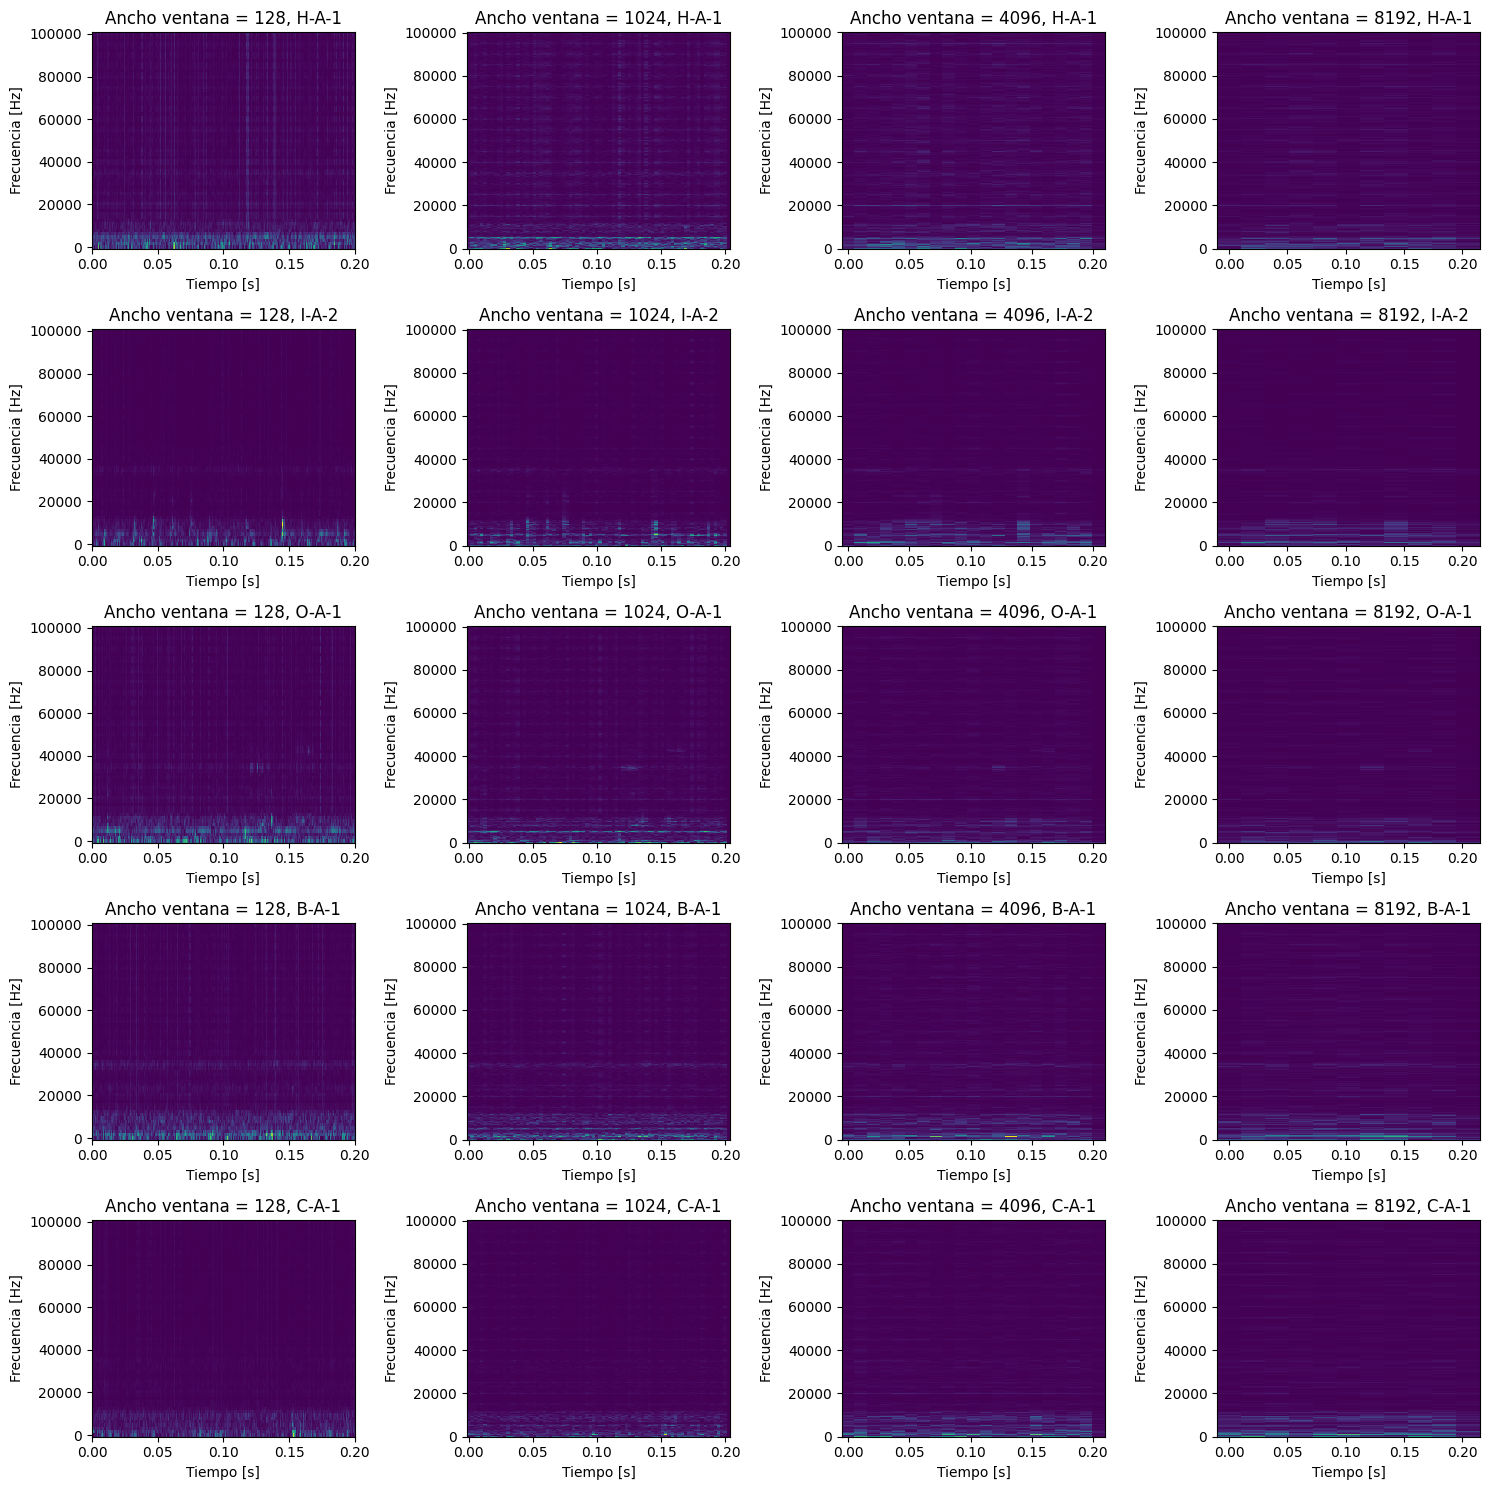

In [58]:
# Iterar sobre los anchos de ventana y crear los gráficos
fig, axs = plt.subplots(5, 4, figsize=(15, 15))
for i, signal in enumerate([H_A_1, I_A_2, O_A_1, B_A_1, C_A_1]):
    for j, window in enumerate(windows):
        f, t, Zxx = scipy.signal.stft(signal, fs=fs, window=get_window('hamming', window), nperseg=window)
        axs[i, j].pcolormesh(t, f, np.abs(Zxx), cmap='viridis', shading='auto')
        axs[i, j].set_ylabel('Frecuencia [Hz]')
        axs[i, j].set_xlabel('Tiempo [s]')
        axs[i, j].set_title('Ancho ventana = {}, {}'.format(window, ['H-A-1', 'I-A-2', 'O-A-1', 'B-A-1', 'C-A-1'][i]))
plt.tight_layout()
plt.savefig('stft_anchos.png', bbox_inches='tight', dpi = 300)

plt.show()



In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import get_window, stft
from scipy.io import loadmat
import matplotlib.colors as colors

In [69]:
#Función 1: Normalización Local.Función que guarda la imagen generada por el espectrograma.
def stft_LOCAL_COLOR(signal, window, window_size, sample_rate, ruta_carpeta, etiqueta, numero):
    #Tipo de ventana
    window_func = get_window(window, window_size)
    
    #STFT
    f, t, Zxx = stft(signal, fs=sample_rate, window=window_func, nperseg=window_size)
    max_amp = np.max(np.abs(Zxx))
        
    # Plot de espectrograma Tiempo-Frecuencia.
    plt.pcolormesh(t, f, np.abs(Zxx), cmap='viridis', vmin=0, vmax= max_amp)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.colorbar()
    
    # Guardar imagen en carpeta
    if ruta_carpeta:
        if not os.path.exists(ruta_carpeta):
            os.makedirs(ruta_carpeta)
        
    # Crear la ruta completa del archivo de imagen
    save_file = os.path.join(ruta_carpeta, f'{etiqueta}_{numero}.png')
    
    plt.savefig(save_file, bbox_inches='tight')
    plt.close()

In [70]:
def stft_SENAL_COLOR(signal, signal_completa, window, window_size, sample_rate, ruta_carpeta, etiqueta, numero):
    #Tipo de ventana
    window_func = get_window(window, window_size)
    
    #STFT por señal completa
    f_s, t_s, Zxx_s  = stft(signal_completa, fs=sample_rate, window=window_func, nperseg=window_size)
    
    #STFT local
    f, t, Zxx = stft(signal, fs=sample_rate, window=window_func, nperseg=window_size)
    
    max_amp = np.max(np.abs(Zxx_s))
        
    # Plot de espectrograma Tiempo-Frecuencia.
    plt.pcolormesh(t, f, np.abs(Zxx), cmap='viridis', vmin=0, vmax= max_amp)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.colorbar()
    
    # Guardar imagen en carpeta
    if ruta_carpeta:
        if not os.path.exists(ruta_carpeta):
            os.makedirs(ruta_carpeta)
        
    # Crear la ruta completa del archivo de imagen
    save_file = os.path.join(ruta_carpeta, f'{etiqueta}_{numero}.png')
    
    plt.savefig(save_file, bbox_inches='tight')
    plt.close()


In [57]:
import scipy.io as sio
from scipy.signal import stft

#Inputs
frecuencia = 200000
ancho_ventana=16384
window_func = window_func = get_window('hamming', ancho_ventana)

#Encontrar máximo.
# Obtener la lista de archivos .mat en la carpeta especificada
carpetas = 'ALL'
listado_archivos = os.listdir(carpetas)
archivos_mat = [archivo for archivo in listado_archivos if archivo.endswith('.mat')] # Contiene lista de todas las etiquetas.
    
# Definir lista para almacenar las señales de vibración
senales_vibracion = []
    
# Leer cada archivo .mat y extraer la señal de vibración
for archivo_mat in archivos_mat:
    ruta_archivo = os.path.join(carpetas, archivo_mat)
    data = sio.loadmat(ruta_archivo)
    senal = data['Channel_1'][:, 0]
    senales_vibracion.append(senal) #La lista contiene todas las señales de vibración en posiciones [0],[1] hasta [60]
    
#  STFT a cada señal de la lista.
stft_senales = []
for senal in senales_vibracion:
    t_all, f_all, amplitud_senal = stft(senal, fs=frecuencia, window=window_func, nperseg=ancho_ventana)
    stft_senales.append(amplitud_senal)
    
# Encontrar el valor máximo de amplitud para normalizar los colores
max_amplitud_global = np.max(np.abs(stft_senales))
print(max_amplitud_global)    

0.02039000616641539


In [58]:
import pandas as pd
array = np.array(stft_senales)
max_AMP = np.max(np.abs(array))
promedio_amplitud_global = np.mean(np.abs(array))
min_amplitud_global = np.mean(np.abs(array))
print(max_AMP)
print(promedio_amplitud_global)
print(min_amplitud_global)

0.02039000616641539
6.484966767862725e-05
6.484966767862725e-05


In [59]:
maximos = []
for i in range(59):
    maximos.append(np.max(np.abs(array[i])))


In [60]:
maximos

[0.0026362672137281995,
 0.0027518530901658005,
 0.0028874881822882614,
 0.0029303476420069483,
 0.003142822716661911,
 0.002927361894950392,
 0.002820822041173106,
 0.002788259702584601,
 0.002737452873507234,
 0.006297388134350566,
 0.0025750360026533586,
 0.00825222755514283,
 0.008894710986419727,
 0.007512035368966663,
 0.00836282688429669,
 0.008476495589023279,
 0.00934630073067912,
 0.008137796645732762,
 0.006555849925245817,
 0.007775892495389705,
 0.007031904583223956,
 0.006950219012576344,
 0.007848390786254949,
 0.007737995870143108,
 0.0017795678231494426,
 0.0022822757654568566,
 0.002021343489712065,
 0.0025717027494802933,
 0.0024948041349748353,
 0.002994645337339599,
 0.0022860045454405546,
 0.0021101157539482195,
 0.0019013059034916153,
 0.0017762231426897708,
 0.0017627028984371267,
 0.003261367104261094,
 0.016623590677156755,
 0.017757739704643158,
 0.01791442323046279,
 0.018353554756645903,
 0.02039000616641539,
 0.017007429837649652,
 0.016277452665190626,
 0

### Función 3 - Normalización Global con STFT.

In [68]:
def stft_GLOBAL_COLOR(signal, max_amplitud_global, window, window_size, sample_rate, ruta_carpeta, etiqueta, numero):
    #Tipo de ventana
    window_func = get_window(window, window_size)
    
    #STFT local
    f, t, Zxx = stft(signal, fs=sample_rate, window=window_func, nperseg=window_size)
        
    # Plot de espectrograma Tiempo-Frecuencia.
    plt.pcolormesh(t, f, np.abs(Zxx), cmap='viridis', vmin=0, vmax= max_amplitud_global)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.colorbar()
    
    # Guardar imagen en carpeta
    if ruta_carpeta:
        if not os.path.exists(ruta_carpeta):
            os.makedirs(ruta_carpeta)
        
    # Crear la ruta completa del archivo de imagen
    save_file = os.path.join(ruta_carpeta, f'{etiqueta}_{numero}.png')
    
    plt.savefig(save_file, bbox_inches='tight')
    plt.close()

In [62]:
ancho_ventana= 16384
i=1

In [63]:
def dividir_senal_en_segmentos(senal, tamano_segmento):
    segmentos = []
    for i in range(0, len(senal), tamano_segmento):
        segmento = senal[i:i+tamano_segmento]
        if len(segmento) == tamano_segmento:
            segmentos.append(segmento)
    segmentos = np.asarray(segmentos)
    shape = np.shape(segmentos)
    segmentos = segmentos.reshape(shape[0],shape[1])
    return segmentos

In [73]:
from scipy.signal import get_window, stft
from scipy.io import loadmat
signal  = sio.loadmat(r'ALL/O-A-2.mat')
signal = signal['Channel_1']

signal_div = dividir_senal_en_segmentos(signal, 120000)

In [74]:
stft_LOCAL_COLOR(signal_div[i,:], 'hamming', ancho_ventana, frecuencia, 'INFORME', 'O_A_1_LOCAL', i)
stft_GLOBAL_COLOR(signal_div[i,:], max_amplitud_global,'hamming', ancho_ventana, frecuencia, 'INFORME', 'O_A_1_GLOBAL', i)
stft_SENAL_COLOR(signal_div[i,:], signal.T ,'hamming', ancho_ventana, frecuencia, 'INFORME', 'O_A_1_senal', i)